In [23]:
# Cell 1: Install Dependencies
# Install Ultralytics YOLOv8 and OpenCV
!pip install ultralytics opencv-python-headless

In [24]:
import kagglehub
import shutil
import os

# Download dataset to KaggleHub cache
cache_path = kagglehub.dataset_download("grassknoted/asl-alphabet")
print("Downloaded to:", cache_path)


Downloaded to: /home/mint/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1


In [25]:
destination = "/home/mint/Downloads/project-kanchan/asl_dataset"

# Create destination folder if it doesn't exist
os.makedirs(destination, exist_ok=True)

# Copy entire dataset folder to your project
shutil.copytree(cache_path, destination, dirs_exist_ok=True)

print("Dataset saved to:", destination)


Dataset saved to: /home/mint/Downloads/project-kanchan/asl_dataset


In [ ]:
# Cell 2: Import Libraries and Setup
import os
import cv2
import numpy as np
from ultralytics import YOLO
from pathlib import Path
import matplotlib.pyplot as plt
from collections import defaultdict

# Auto-download dataset via kagglehub
path = '/home/mint/Downloads/project-kanchan/asl_dataset/'


print("Path to dataset files:", path)

# Updated paths using downloaded structure
INPUT_TRAIN_PATH = os.path.join(path, 'asl_alphabet_train', 'asl_alphabet_train')
TEST_PATH = os.path.join(path, 'asl_alphabet', 'asl_alphabet_test')

NUM_CLASSES = 29  # A-Z + del + nothing + space

# Verify paths
if os.path.exists(INPUT_TRAIN_PATH):
    print(f"Train path OK: {INPUT_TRAIN_PATH}")
    classes = sorted(os.listdir(INPUT_TRAIN_PATH))
    print(f"Classes found: {len(classes)} ({classes[:5]}...)")
else:
    print("Error: Train path not found.")

if os.path.exists(TEST_PATH):
    print(f"Test path OK: {TEST_PATH}")
    test_files = [f for f in os.listdir(TEST_PATH) if f.endswith('_test.jpg')]
    print(f"Test files found: {len(test_files)}")
else:
    print("Error: Test path not found.")

print(f"Number of classes: {NUM_CLASSES}")

Path to dataset files: /home/mint/Downloads/project-kanchan/asl_dataset/
Train path OK: /home/mint/Downloads/project-kanchan/asl_dataset/asl_alphabet_train/asl_alphabet_train
Classes found: 29 (['A', 'B', 'C', 'D', 'E']...)
Test path OK: /home/mint/Downloads/project-kanchan/asl_dataset/asl_alphabet_test/asl_alphabet_test
Test files found: 28
Number of classes: 29


Classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


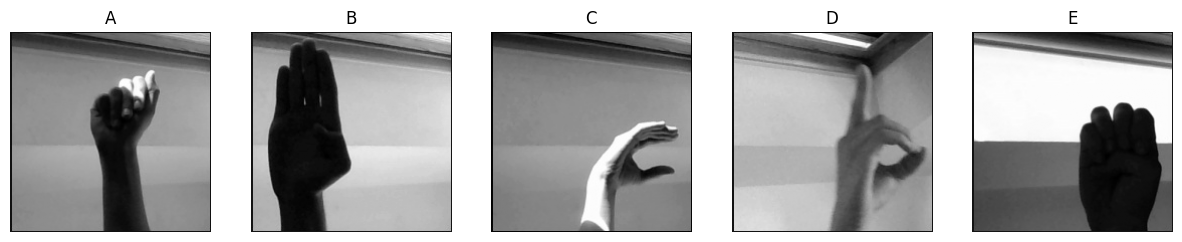

In [34]:
# Cell 3: Explore Dataset (Optional)
# List classes from input train
classes = sorted(os.listdir(INPUT_TRAIN_PATH))
print("Classes:", classes)

# Sample images from a few classes
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i, cls in enumerate(classes[:5]):
    img_files = os.listdir(os.path.join(INPUT_TRAIN_PATH, cls))
    img_path = os.path.join(INPUT_TRAIN_PATH, cls, img_files[0])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(cls)
    axs[i].axis('off')
plt.show()

In [35]:
import os
import random
import shutil
from pathlib import Path

random.seed(42)

# Correct folder containing A, B, C, ..., space
INPUT_TRAIN_PATH = Path(
    "/home/mint/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train"
)

classes = [
    'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
    'del', 'nothing', 'space'
]

DATASET_ROOT = Path("/home/mint/Downloads/project-kanchan/asl_dataset")
TRAIN_DIR = DATASET_ROOT / "train"
VAL_DIR = DATASET_ROOT / "val"
TEST_DIR = DATASET_ROOT / "test"

# Remove old dataset
if DATASET_ROOT.exists():
    shutil.rmtree(DATASET_ROOT)

TRAIN_DIR.mkdir(parents=True, exist_ok=True)
VAL_DIR.mkdir(parents=True, exist_ok=True)
TEST_DIR.mkdir(parents=True, exist_ok=True)

train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

for cls in classes:
    src_class_dir = INPUT_TRAIN_PATH / cls

    if not src_class_dir.exists():
        print(f"❌ Missing class folder: {cls} → {src_class_dir}")
        continue

    img_files = list(src_class_dir.glob("*.jpg"))

    if len(img_files) == 0:
        print(f"⚠️ No images found in: {cls}")
        continue

    random.shuffle(img_files)

    # Calculate split points
    n = len(img_files)
    train_end = int(n * train_ratio)
    val_end = int(n * (train_ratio + val_ratio))

    train_files = img_files[:train_end]
    val_files = img_files[train_end:val_end]
    test_files = img_files[val_end:]

    # Create class dirs
    (TRAIN_DIR / cls).mkdir(exist_ok=True)
    (VAL_DIR / cls).mkdir(exist_ok=True)
    (TEST_DIR / cls).mkdir(exist_ok=True)

    # Symlink files
    for img_path in train_files:
        os.symlink(img_path, TRAIN_DIR / cls / img_path.name)

    for img_path in val_files:
        os.symlink(img_path, VAL_DIR / cls / img_path.name)

    for img_path in test_files:
        os.symlink(img_path, TEST_DIR / cls / img_path.name)

    print(f"✔ {cls}: {len(train_files)} train, {len(val_files)} val, {len(test_files)} test")

print("\n🎉 Dataset created at:", DATASET_ROOT)
print("Train total:", sum(len(list((TRAIN_DIR / c).glob('*'))) for c in classes))
print("Val total:", sum(len(list((VAL_DIR / c).glob('*'))) for c in classes))
print("Test total:", sum(len(list((TEST_DIR / c).glob('*'))) for c in classes))


✔ A: 2100 train, 599 val, 301 test
✔ B: 2100 train, 599 val, 301 test
✔ C: 2100 train, 599 val, 301 test
✔ D: 2100 train, 599 val, 301 test
✔ E: 2100 train, 599 val, 301 test
✔ F: 2100 train, 599 val, 301 test
✔ G: 2100 train, 599 val, 301 test
✔ H: 2100 train, 599 val, 301 test
✔ I: 2100 train, 599 val, 301 test
✔ J: 2100 train, 599 val, 301 test
✔ K: 2100 train, 599 val, 301 test
✔ L: 2100 train, 599 val, 301 test
✔ M: 2100 train, 599 val, 301 test
✔ N: 2100 train, 599 val, 301 test
✔ O: 2100 train, 599 val, 301 test
✔ P: 2100 train, 599 val, 301 test
✔ Q: 2100 train, 599 val, 301 test
✔ R: 2100 train, 599 val, 301 test
✔ S: 2100 train, 599 val, 301 test
✔ T: 2100 train, 599 val, 301 test
✔ U: 2100 train, 599 val, 301 test
✔ V: 2100 train, 599 val, 301 test
✔ W: 2100 train, 599 val, 301 test
✔ X: 2100 train, 599 val, 301 test
✔ Y: 2100 train, 599 val, 301 test
✔ Z: 2100 train, 599 val, 301 test
✔ del: 2100 train, 599 val, 301 test
✔ nothing: 2100 train, 599 val, 301 test
✔ space: 210

In [7]:
from ultralytics import YOLO
from pathlib import Path
import os

# Dataset root
DATASET_ROOT = Path("/home/mint/Downloads/project-kanchan/asl_dataset")

print("Using dataset:", DATASET_ROOT)

# Load YOLOv8 classification model
model = YOLO("yolov8n-cls.pt")

# TRAIN
results = model.train(
    data=str(DATASET_ROOT),
    epochs=20,
    imgsz=160,
    batch=4,
    workers=1,
    device="cpu",      # or "cuda:0" if GPU is good
    name='asl_yolo_cls',
    project='runs/asl_project',
    save=True,
    plots=True
)


print("Training complete!")
print("Best model saved at:")
print("/home/mint/Downloads/project-kanchan/yolo_runs/asl_yolo_cls/weights/best.pt")


Using dataset: /home/mint/Downloads/project-kanchan/asl_dataset
Ultralytics 8.3.228 🚀 Python-3.12.3 torch-2.9.1+cu128 CPU (AMD Ryzen 7 5800H with Radeon Graphics)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/home/mint/Downloads/project-kanchan/asl_dataset, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=160, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=asl_yolo_cls, nbs=64, nms=False, ops

In [30]:
model = YOLO("/home/mint/Downloads/project-kanchan/runs/asl_project/asl_yolo_cls/weights/best.pt")

metrics = model.val(data=str(DATASET_ROOT))
print(metrics)


Ultralytics 8.3.228 🚀 Python-3.12.3 torch-2.9.1+cu128 CPU (AMD Ryzen 7 5800H with Radeon Graphics)
YOLOv8n-cls summary (fused): 30 layers, 1,472,029 parameters, 0 gradients, 3.3 GFLOPs
train: /home/mint/Downloads/project-kanchan/asl_dataset/train... found 69600 images in 29 classes ✅ 
val: /home/mint/Downloads/project-kanchan/asl_dataset/val... found 17400 images in 29 classes ✅ 
test: None...
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 583.1±200.6 MB/s, size: 13.1 KB)
val: Scanning /home/mint/Downloads/project-kanchan/asl_dataset/val... 17400 images, 0 corrupt: 100% ━━━━━━━━━━━━ 17400/17400 4.9Kit/s 3.6s0.0s
val: New cache created: /home/mint/Downloads/project-kanchan/asl_dataset/val.cache
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 1088/1088 28.0it/s 38.9s<0.0s
                   all          1          1
Speed: 0.0ms preprocess, 1.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/mint/Downloads/project-kanchan/runs/classify/val
u

Test directory found.
Total test images: 8729


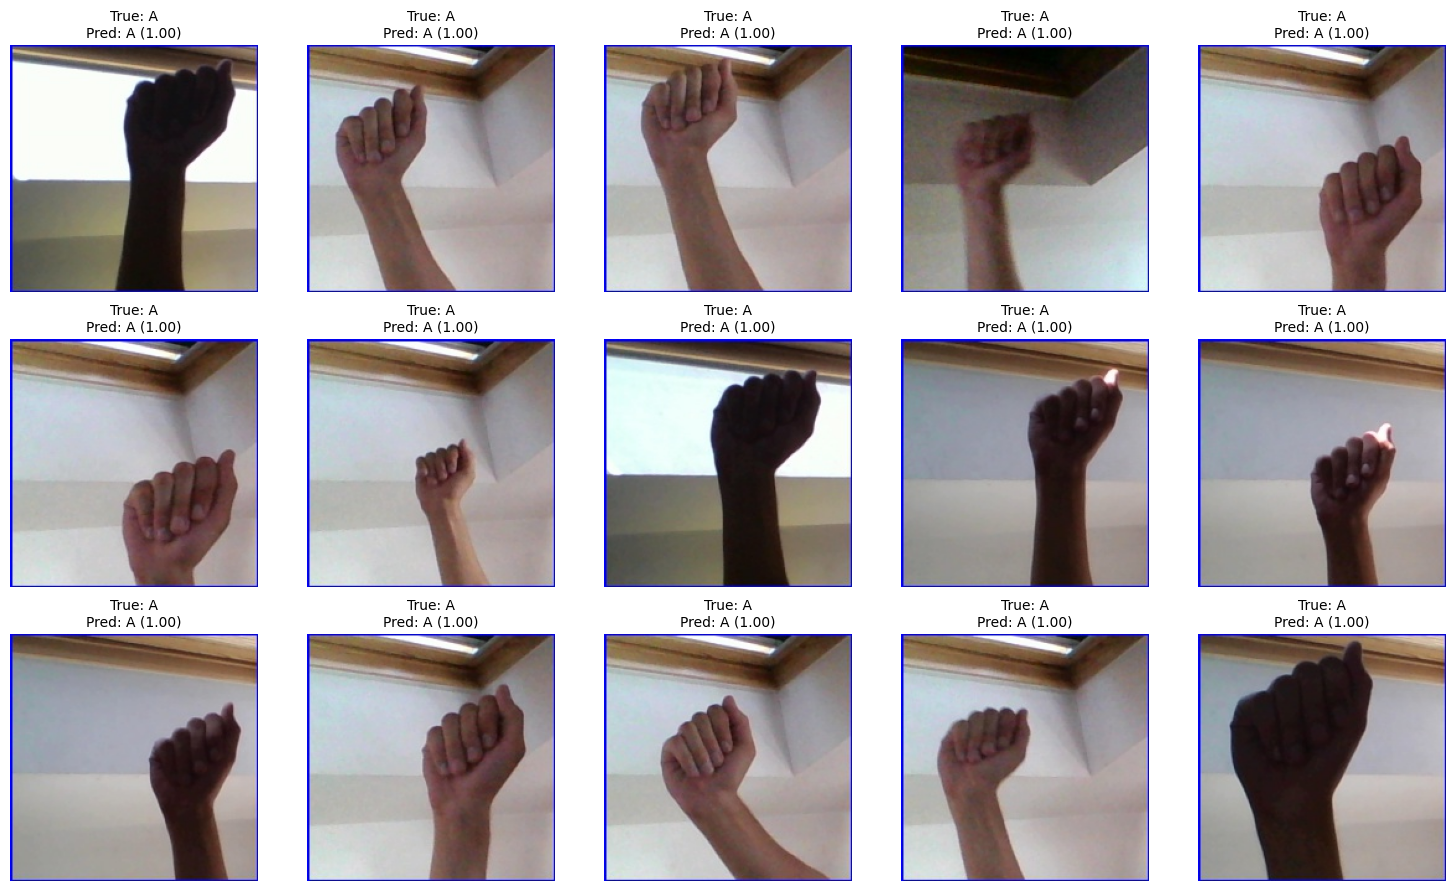


Test Accuracy: 99.97% (8726/8729)

Per-Class Accuracy:
A: 100.0%
B: 100.0%
C: 100.0%
D: 100.0%
E: 100.0%
F: 100.0%
G: 100.0%
H: 100.0%
I: 100.0%
J: 100.0%
K: 100.0%
L: 100.0%
M: 100.0%
N: 100.0%
O: 100.0%
P: 100.0%
Q: 100.0%
R: 99.7%
S: 100.0%
T: 100.0%
U: 100.0%
V: 100.0%
W: 100.0%
X: 100.0%
Y: 100.0%
Z: 100.0%
del: 99.3%
nothing: 100.0%
space: 100.0%


In [42]:
model = YOLO('/home/mint/Downloads/project-kanchan/runs/asl_project/asl_yolo_cls/weights/best.pt')

TEST_PATH = Path('/home/mint/Downloads/project-kanchan/asl_dataset/test')

if TEST_PATH.exists():
    print("Test directory found.")

    # All test image paths + their true label
    test_images = []
    true_labels = []

    for cls_folder in sorted(TEST_PATH.iterdir()):
        if cls_folder.is_dir():
            cls_name = cls_folder.name
            imgs = list(cls_folder.glob("*.jpg"))
            for img in imgs:
                test_images.append(img)
                true_labels.append(cls_name)

    print(f"Total test images: {len(test_images)}")

    predictions = []
    confidences = []
    correct = 0

    # Plot sample 15 images
    fig, axs = plt.subplots(3, 5, figsize=(15, 9))
    axs = axs.flatten()

    for i, (img_path, true_label) in enumerate(zip(test_images, true_labels)):
        img = cv2.imread(str(img_path))

        results = model.predict(str(img_path), verbose=False)
        pred_idx = results[0].probs.top1
        pred_label = model.names[pred_idx]
        conf = results[0].probs.top1conf.item()

        predictions.append(pred_label)
        confidences.append(conf)

        if pred_label == true_label:
            correct += 1

        # show first 15 images
        if i < 15:
            axs[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            axs[i].set_title(f"True: {true_label}\nPred: {pred_label} ({conf:.2f})", fontsize=10)
            axs[i].axis('off')

    # Hide unused plots
    for j in range(i + 1, len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()

    # Accuracy
    accuracy = (correct / len(test_images)) * 100
    print(f"\nTest Accuracy: {accuracy:.2f}% ({correct}/{len(test_images)})")

    # Per-class accuracy
    class_acc = defaultdict(int)
    class_total = defaultdict(int)

    for true, pred in zip(true_labels, predictions):
        class_total[true] += 1
        if true == pred:
            class_acc[true] += 1

    print("\nPer-Class Accuracy:")
    for cls in sorted(class_total.keys()):
        acc = (class_acc[cls] / class_total[cls]) * 100
        print(f"{cls}: {acc:.1f}%")

else:
    print("❌ Test path not found — skipping validation.")

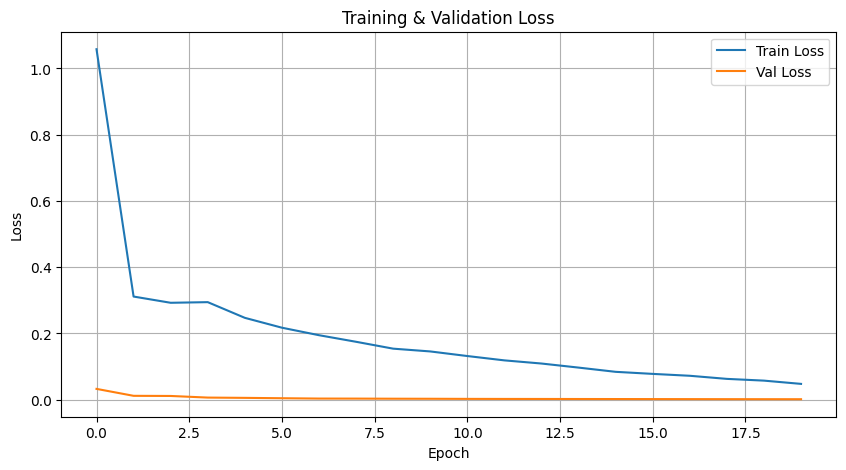

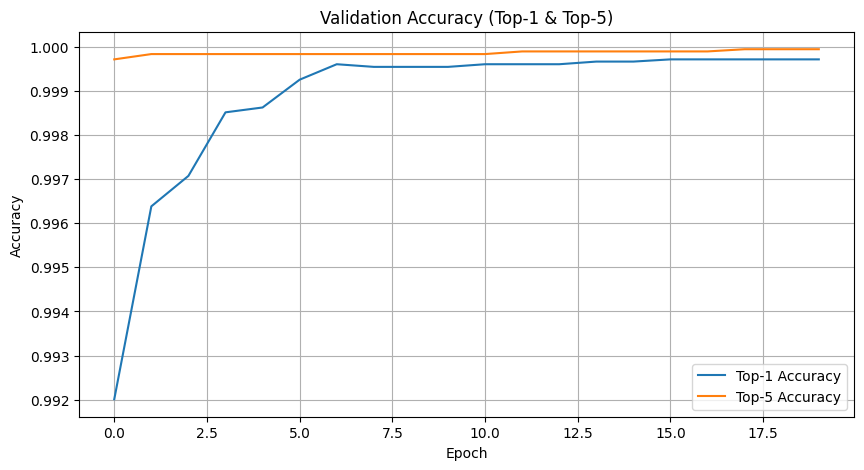

In [45]:
# Cell 6: Plot Training & Validation Curves

import pandas as pd
import matplotlib.pyplot as plt
import os

# Correct path for local machine
results_csv = "/home/mint/Downloads/project-kanchan/runs/asl_project/asl_yolo_cls/results.csv"

if not os.path.exists(results_csv):
    raise FileNotFoundError(f"results.csv not found! Check this path:\n{results_csv}")

# Load log file
df = pd.read_csv(results_csv)

# Plot Loss Curves
plt.figure(figsize=(10,5))
plt.plot(df["train/loss"], label="Train Loss")
plt.plot(df["val/loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy Curves
plt.figure(figsize=(10,5))
plt.plot(df["metrics/accuracy_top1"], label="Top-1 Accuracy")
plt.plot(df["metrics/accuracy_top5"], label="Top-5 Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy (Top-1 & Top-5)")
plt.legend()
plt.grid(True)
plt.show()
